# AI Saturdays ML Sesion 4 (Unsupervised) - Challenge!

### Mushroom Dataset

You can obtain the dataset in the link below:

[Mushroom Dataset](https://www.kaggle.com/uciml/mushroom-classification)

As you'll see, there's a big amount of features, all categorical, so there's no use in creating visuals like Scatterplots.

The target variable ``class`` is categorical, so there's no need for rescaling.


In [1]:
# You can add more libraries if needed :)

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.decomposition import PCA

### Load the data

In [2]:
# Read the data and display it
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Exploratory Data Analysis 

In [3]:
# Describe the dataset
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
# Information about each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#### Calculate the NaNs 

In [5]:
# same as on previous notebooks ;)
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### Look for outliers. This is, search for values that are different in each feature

<AxesSubplot:xlabel='veil-color', ylabel='Count'>

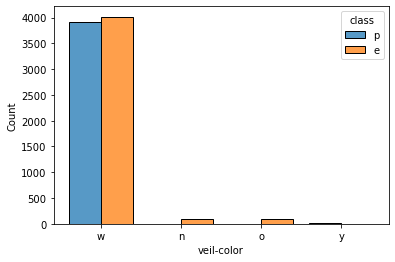

In [6]:
# Check column "veil-color", what is the distrbution by class?
# You may need to create a new dataframe...
df_new = df[["class", "veil-color"]]
sns.histplot(data = df_new, x="veil-color", hue = "class", multiple="dodge", shrink=0.8)

In [7]:
### Optional ####
#Check the different values for every feature

columns = df.columns
n_values = [df[a].unique() for a in df.columns]

counts = pd.DataFrame()
counts['features'] = columns
counts['n_values'] = n_values
counts

,features,n_values
0,class,"[p, e]"
1,cap-shape,"[x, b, s, f, k, c]"
2,cap-surface,"[s, y, f, g]"
3,cap-color,"[n, y, w, g, e, p, b, u, c, r]"
4,bruises,"[t, f]"
5,odor,"[p, a, l, n, f, c, y, s, m]"
6,gill-attachment,"[f, a]"
7,gill-spacing,"[c, w]"
8,gill-size,"[n, b]"
9,gill-color,"[k, n, g, p, w, h, u, e, b, r, y, o]"


#### Solve the sparsity of the data

In [10]:
# Map the values that are not "w" together.
df['veil-color'][df['veil-color'] != 'w'] = 'o'

#### Look how many different values there are in every feature, are all of them relevant? Otherwise, eliminate it.

In [11]:
# drop drop baby
# Check for unique values (.nunique()?)
print(df.nunique())  # If a column has only one value... It adds no information
df.drop("veil-type", axis=1, inplace=True)

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   2
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64


#### Separate between target and input variables

In [12]:
# In our case, the target variable is "class"
y = df["class"]
X = df.drop("class", axis = 1)

#### Get categorical variables to numerical

In [14]:
# One hot, one-liner
X = pd.get_dummies(X)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


#### Train test split, duh ;)

In [15]:
# We'll just leave this here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## PCA

We have still not seen anything (no visuals) from this dataset, so let's make some. The problem is there are many variables... So **PCA** comes in very handy: We ask for two variables and we plot them. We know it will we the ones that will keep the **most information**.

<AxesSubplot:>

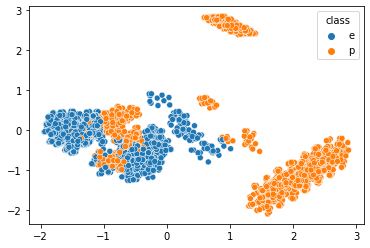

In [17]:
pca = PCA(n_components=2) #We'll just leave this here for you..
pca.fit(X_train) # FIT
painting = pca.transform(X_train) #TRANSFORM

# Make a scatterplot and color the training features
sns.scatterplot(x = painting[:,0], y = painting[:,1], hue = y_train , legend = "full")

Seems it is quite OKAY already! Anyways, let´s try to make a classifier ;)

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Define classifier and number of estimators
# train the model
# calculate accuracy

clf = RandomForestClassifier(n_estimators = 50) # Una mera prueba, yo le metí 50 en un primer intento
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

1.0

Oh sh*t, It is the perfect predictor!! Better check that you have correctly defined the target variable.

Naaaah don´t worry, the dataset is quite simple and Random Forest is really good at it. Let's check the size of the train dataset.

In [ ]:
X_train.shape

Ufffffff Lots of features. Let's now try predicting with less features.

<AxesSubplot:>

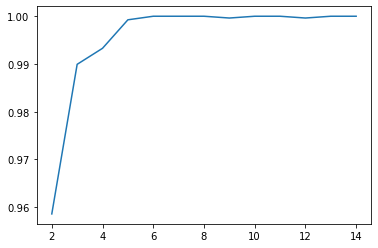

In [20]:
n_features = range(2,15) #Define yourself a range of values to try out
scores = []

for n in n_features:
    
    # Make PCA over X_train
    # 1- Define PCA
    # 2- Fit PCA over X_train
    
    # Train Random Forest
    # 1- Define RF
    # 2- Train Classifier
    
    # Save the score


    pca = PCA(n_components=n)
    pca.fit(X_train)
    clf = RandomForestClassifier(n_estimators = 50)
    clf.fit(pca.transform(X_train), y_train)
    scores.append(clf.score(pca.transform(X_test),y_test))
    
sns.lineplot(x=n_features, y=scores)
    


Okay, so we can see that by 10 features we have a great score and we have a 10% of the features we had.

## Clustering

Seeing the dataset is quite simple, it might be a good idea to apply Clustering to see if we can further extract valuable information.

First import Kmeans from sklearn, from there, look for the optimal number of clusters. As we have previously seen, this value we obtain by looking at the elbow curve that represents the total distances from the points to the centroids. It'd be good that you take a look at the documentation:

[K-Means on sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Now we ought to generate the models for the different k's, and plot the curve




<AxesSubplot:>

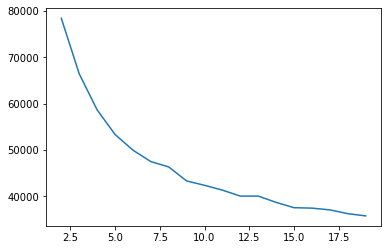

In [22]:
from sklearn.cluster import KMeans

scores = []
k_values = range(2,20) # define range of values
for a in k_values:
    
    # Define Kmeans and adjust
    # Save the prediction
    

    kmeans = KMeans(n_clusters=a, random_state=0).fit(X)
    scores.append(kmeans.inertia_)
    
    
    
    
sns.lineplot(x=k_values, y=scores)

With the defined number of centroids (looking at the elbow curve), we can check the distribution for every centroid with a ``factorplot``, seaborn takes care of this.

C:\Users\ivorr\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


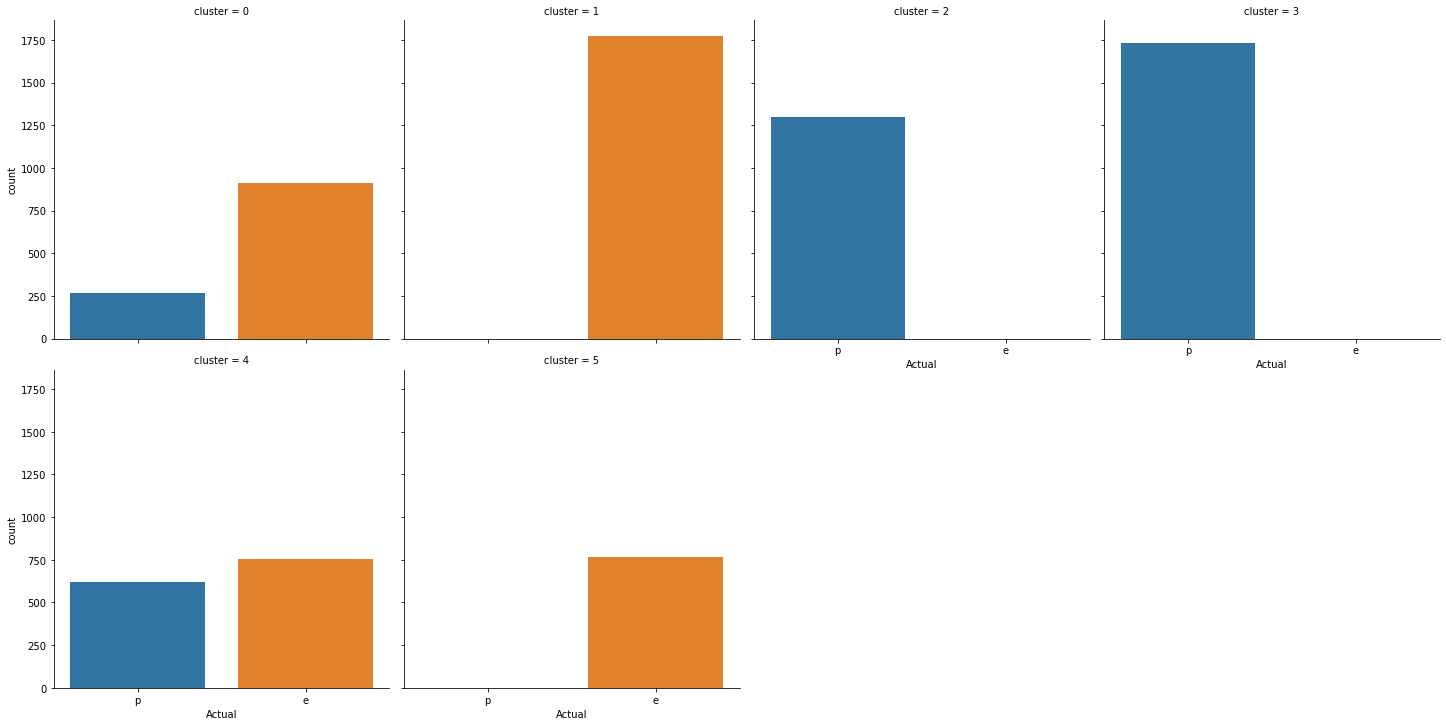

In [23]:
# Get the KMEANS with the defined number of centroids

kmeans = KMeans(n_clusters=6, random_state=0).fit(X)

# Prepare the factorplot
cluster_result = pd.DataFrame()
cluster_result['cluster'] = kmeans.predict(X)
cluster_result['Actual'] = y

ax = sns.factorplot(col='cluster', x='Actual', data=cluster_result, kind='count',col_wrap=4)

Let's see how the clusters are assigned to the data points

<AxesSubplot:>

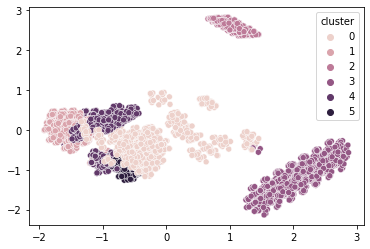

In [24]:
# Train PCA to plot
pca = PCA(n_components=2)
pca.fit(X)
painting = pca.transform(X)

# Represent with a color for each cluster 
sns.scatterplot(x = painting[:,0], y = painting[:,1], hue = cluster_result['cluster'] , legend = "full")

¿It is very similar, isn´t it? Not as good as the ever wonderful Random Forest, but it managed to identify properly the differences in the dataset. In fact, the previous factorplot shows that only a couple of clusters are not well predicted, the rest are properly determiend.